# Contrast Limited Adaptive Histogram Equalization (CLAHE) for Contrast Enhancement on Images

**Made by: Group 6 for Pattern Recognition Class**
 - Timothy Chan - PPT
 - Rhyle Nodnylson Guinto - PPT
 - Chino Laguda - PPT
 - Randall Joseph Pajaro - Python Ntbk

In [1]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

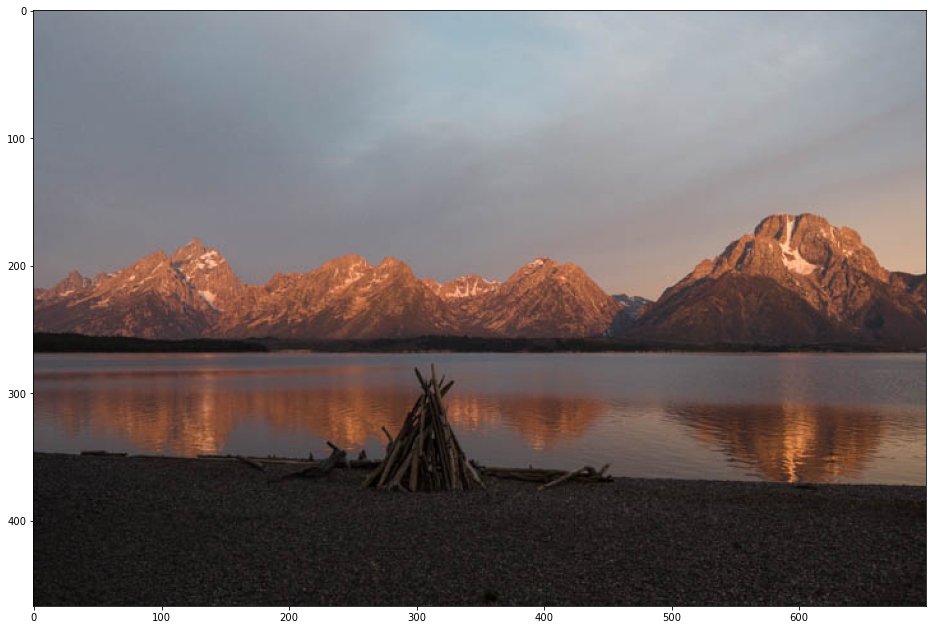

In [2]:
# sample image
sample = mpimg.imread('imgs/sample.jpg')
plt.rcParams["figure.figsize"] = (16,16) #just to resize the plot to make it bigger
plt.imshow(sample)

plt.show()

## Applying Histogram Equalization using Numpy

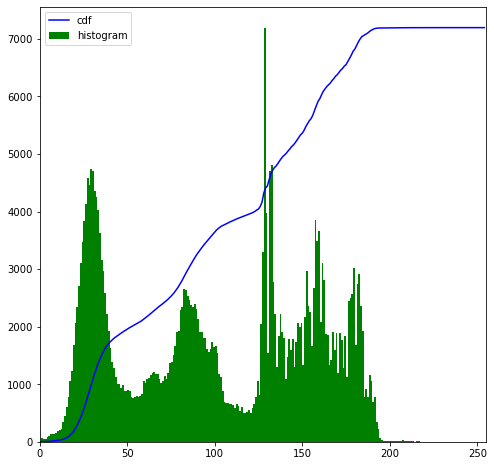

True

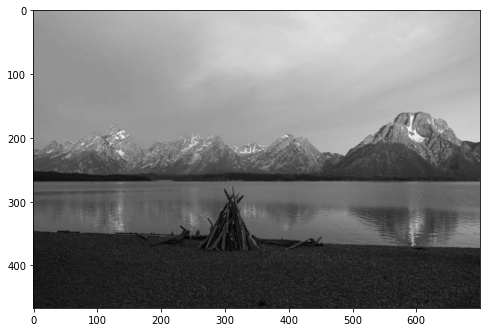

In [3]:
import numpy as np
import cv2 as cv

img = cv.imread('imgs/sample.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY) #converting image to grayscale
hist,bins = np.histogram(img.flatten(),255,[0,255])

cdf = hist.cumsum() 
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.rcParams["figure.figsize"] = (8,8)
plt.plot(cdf_normalized, color='b')
plt.hist(img.flatten(),255,[0,255],color='g')
plt.xlim([0,255])
plt.legend(('cdf','histogram'),loc='upper left')
plt.show()
plt.imshow(img, cmap='gray')

cv.imwrite('gray_samp.jpg',img) #saves grayscaled image

# blue line is the cumulative sum
# x = black-white tone of the pixels (0-255)
# y = total number of pixels in each tone

**Applying Histogram Equalization using Numpy masked arrays**

formula: https://medium.com/hackernoon/histogram-equalization-in-python-from-scratch-ebb9c8aa3f23

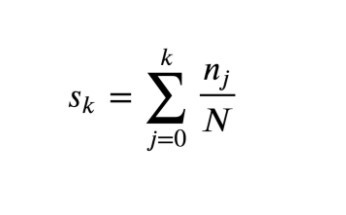

In [4]:
from IPython.display import Image
Image(filename='imgs/hist_eq_formula.jpg')

In [5]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max() - cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

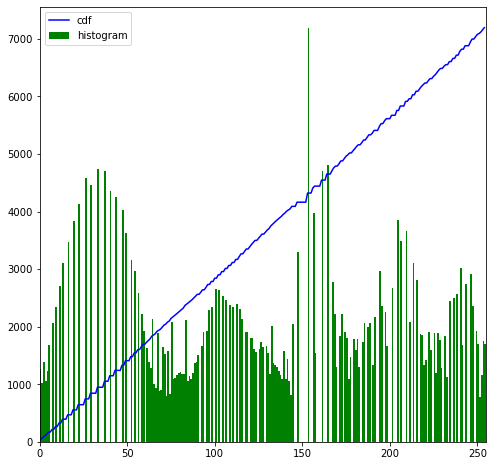

True

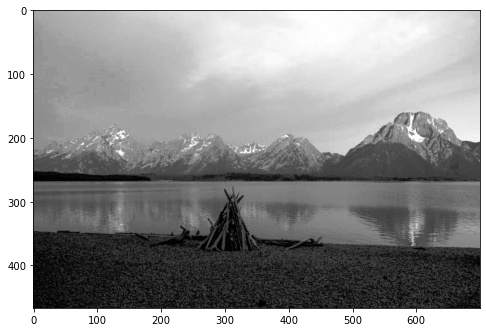

In [6]:
he_numpy_img = cdf[img]
hist,bins = np.histogram(he_numpy_img.flatten(),255,[0,255])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.rcParams["figure.figsize"] = (8,8)
plt.plot(cdf_normalized, color='b')
plt.hist(he_numpy_img.flatten(),255,[0,255],color='g')
plt.xlim([0,255])
plt.legend(('cdf','histogram'),loc='upper left')
plt.show()
plt.imshow(he_numpy_img, cmap='gray')

cv.imwrite('he_samp.jpg',he_numpy_img) #saves image with HE applied

## Applying Histogram Equalization using OpenCV

In [7]:
import numpy as np
import cv2 as cv

img = cv.imread('imgs/sample.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY) #converting image to grayscale

hist_eq = cv.equalizeHist(img)
res = np.hstack((img,hist_eq))
cv.imwrite('open_cv_he.jpg',res)

True

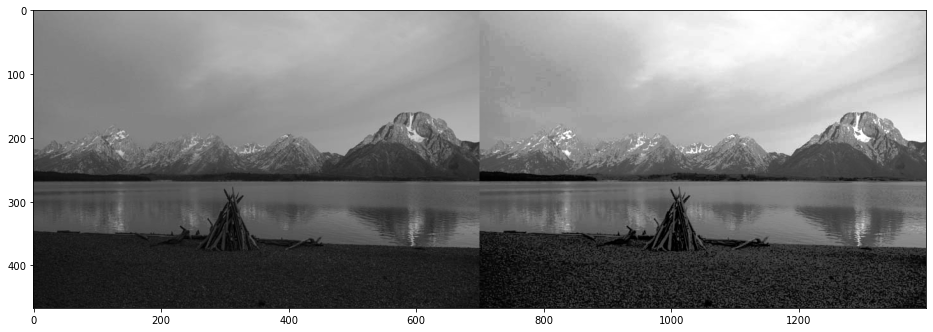

In [8]:
plt.rcParams["figure.figsize"] = (16,16)
plt.imshow(res, cmap='gray')

#left image is the original
#right image is the one with histogram equalization applied

## Applying CLAHE using OpenCV

True

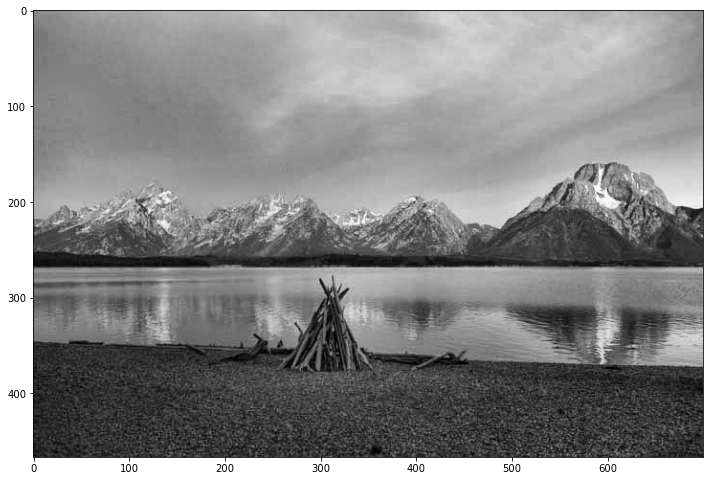

In [9]:
import numpy as np
import cv2 as cv

img = cv.imread('imgs/sample.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY) #converting image to grayscale

clahe = cv.createCLAHE(clipLimit=2)
clahe_img = clahe.apply(img)

plt.rcParams["figure.figsize"] = (12,12)
plt.imshow(clahe_img,cmap='gray')
cv.imwrite('clahe_img.jpg',clahe_img)

In conclusion, we observed that by applying histogram equalization on an image globally, the result of the contrast enhancement would show the more dominant intensity. 

Meaning if a dominant area of the image is composed of a brighter intensity, the darker parts of the image may not have increased contrast due to having a limited contrast increase globally; whereas if the dominant area of the image is composed of a lower intensity, it could over-intesify the contrast of the brighter areas of the image. (for this image, the former was present.)

Numpy version of histogram equalization and CLAHE from: https://docs.opencv.org/master/d5/daf/tutorial_py_histogram_equalization.html

## Real Application of CLAHE (Fundus Image Processing)

This part of the program shows how CLAHE can be utilized for fundus image analysis, specifically for taking drusen regions in these images for AMD Classification.

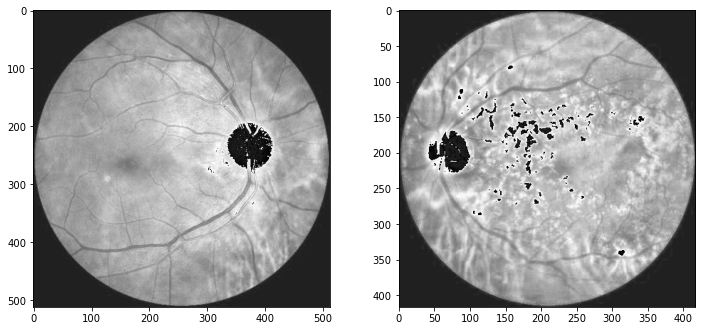

In [10]:
import numpy as np
import cv2 as cv

img = cv.imread('imgs/amd.jpg')
img2 = cv.imread('imgs/normal.jpg')

# Extracting the red channel since drusen regions and optic discs are more dominant on this channel
b,g,r = cv.split(img)
amd = r
b,g,r = cv.split(img2)
n = r

clahe = cv.createCLAHE(clipLimit=2)
drusen = clahe.apply(amd) + 30 # we add 30 to increase the intensity of the contrast
normal = clahe.apply(n) + 30

plt.subplot(2, 2, 1)
plt.imshow(normal,cmap='gray')

plt.subplot(2, 2, 2)
plt.imshow(drusen,cmap='gray')